## Goal:
* Discover drivers of churn within the Telco dataset
* Use these drivers to develop a machine learning model to predict whether or not a customer will churn

#### Imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire
import wrangle as w
import env
import explore

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

## Acquire
* Data acquired from Codeup Database
* It contained 7043 rows and 24 columns before cleaning
* Each row represents a customer from the Telco company
* Each column represents a feature of those customers

## Prepare
### Prepare Actions:

* Dropped duplicate columns
* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Checked for nulls in the data (there were none)
* Dropped Null Values stored as whitespace
* Checked that column data types were appropriate, converted total charges to the correct data type
* Encoded categorical variables
* Split data into train, validate and test (approx. 75/12.5/12.5), stratifying on 'churn'
* Outliers have not been removed for this iteration of the project

In [2]:
# acquiring telco data from codeup database
df = w.get_telco_data()

#Preparing telco data for exploration
df = w.prep_telco(df)

#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

## A brief look at the data

In [3]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,0,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,0


## Summary of the data

In [4]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.163145,32.549573,64.640583,2279.278230,0.495530,0.491670,0.301910,0.903088,0.590207,0.265949,...,0.546323,0.208046,0.245632,0.341325,0.438643,0.220033,0.215766,0.224096,0.335636,0.224502
std,0.369536,24.563833,30.096846,2254.640564,0.500031,0.499981,0.459133,0.295868,0.491845,0.441882,...,0.497900,0.405951,0.430505,0.474202,0.496271,0.414310,0.411394,0.417028,0.472260,0.417296
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.150000,400.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1398.975000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.850000,3810.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploration

## What is the percentage of customers who churn?

In [5]:
#Target variable value counts
train.churn.value_counts()

0    3613
1    1309
Name: churn, dtype: int64

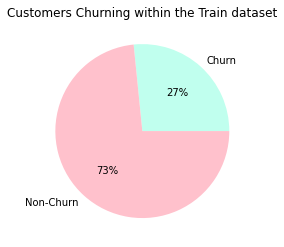

In [6]:
w.get_pie_churn(train)

* **Approximately 27 percent of customers in this dataset "churned" (left the company)**

In [7]:
num_vars = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
cat_vars = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', \
            'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing','contract_type','internet_service_type', \
            'payment_type']

gender
Male      2483
Female    2439
Name: gender, dtype: int64
Male      50.446973
Female    49.553027
Name: gender, dtype: float64


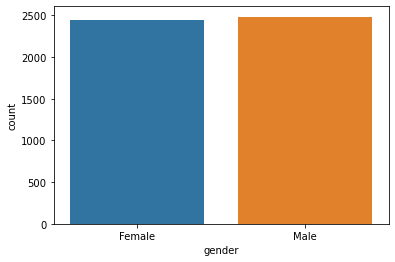

partner
No     2502
Yes    2420
Name: partner, dtype: int64
No     50.832995
Yes    49.167005
Name: partner, dtype: float64


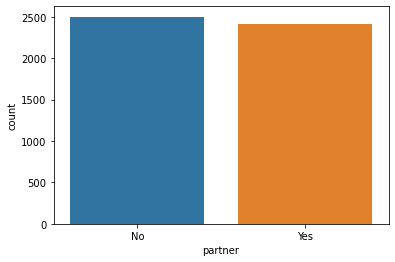

dependents
No     3436
Yes    1486
Name: dependents, dtype: int64
No     69.809021
Yes    30.190979
Name: dependents, dtype: float64


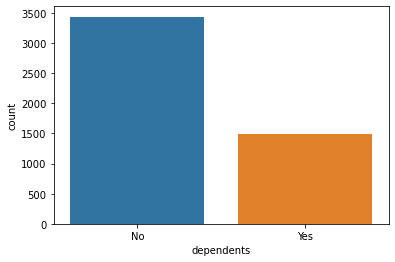

phone_service
Yes    4445
No      477
Name: phone_service, dtype: int64
Yes    90.308818
No      9.691182
Name: phone_service, dtype: float64


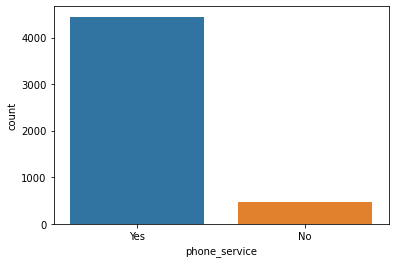

multiple_lines
No                  2392
Yes                 2053
No phone service     477
Name: multiple_lines, dtype: int64
No                  48.598131
Yes                 41.710687
No phone service     9.691182
Name: multiple_lines, dtype: float64


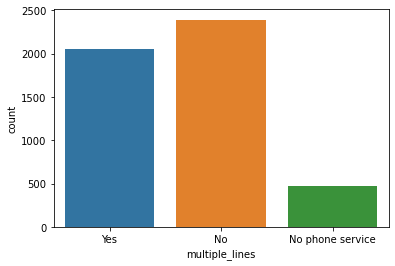

online_security
No                     2437
Yes                    1402
No internet service    1083
Name: online_security, dtype: int64
No                     49.512393
Yes                    28.484356
No internet service    22.003251
Name: online_security, dtype: float64


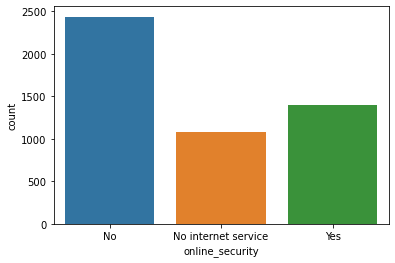

online_backup
No                     2141
Yes                    1698
No internet service    1083
Name: online_backup, dtype: int64
No                     43.498578
Yes                    34.498171
No internet service    22.003251
Name: online_backup, dtype: float64


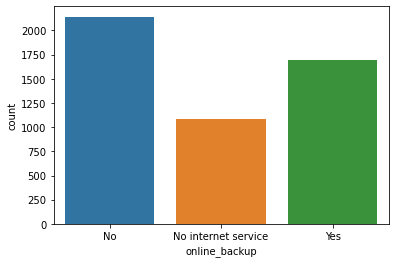

device_protection
No                     2137
Yes                    1702
No internet service    1083
Name: device_protection, dtype: int64
No                     43.417310
Yes                    34.579439
No internet service    22.003251
Name: device_protection, dtype: float64


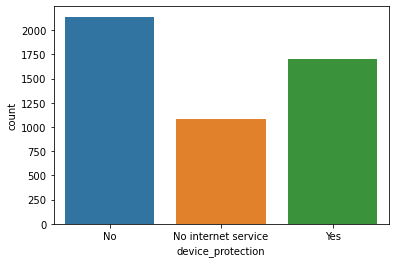

tech_support
No                     2406
Yes                    1433
No internet service    1083
Name: tech_support, dtype: int64
No                     48.882568
Yes                    29.114181
No internet service    22.003251
Name: tech_support, dtype: float64


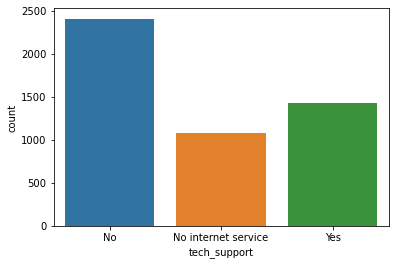

streaming_tv
No                     1967
Yes                    1872
No internet service    1083
Name: streaming_tv, dtype: int64
No                     39.963430
Yes                    38.033320
No internet service    22.003251
Name: streaming_tv, dtype: float64


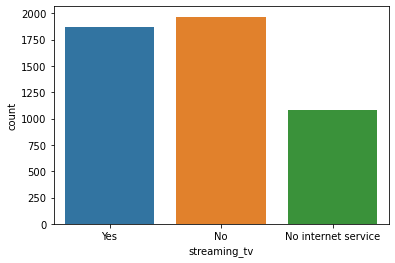

streaming_movies
Yes                    1922
No                     1917
No internet service    1083
Name: streaming_movies, dtype: int64
Yes                    39.049167
No                     38.947582
No internet service    22.003251
Name: streaming_movies, dtype: float64


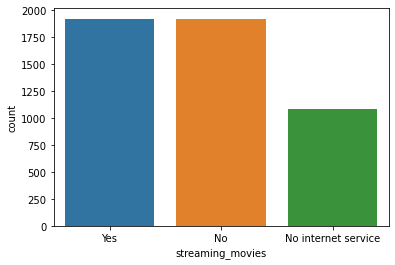

paperless_billing
Yes    2905
No     2017
Name: paperless_billing, dtype: int64
Yes    59.020723
No     40.979277
Name: paperless_billing, dtype: float64


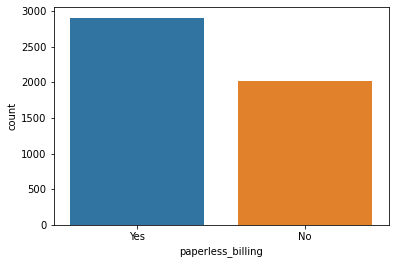

contract_type
Month-to-month    2689
Two year          1209
One year          1024
Name: contract_type, dtype: int64
Month-to-month    54.632263
Two year          24.563186
One year          20.804551
Name: contract_type, dtype: float64


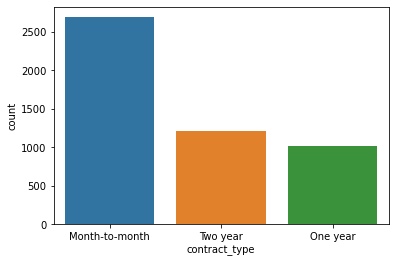

internet_service_type
Fiber optic    2159
DSL            1680
None           1083
Name: internet_service_type, dtype: int64
Fiber optic    43.864283
DSL            34.132466
None           22.003251
Name: internet_service_type, dtype: float64


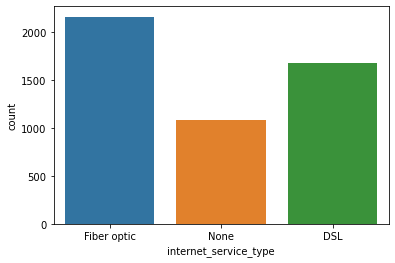

payment_type
Electronic check             1652
Mailed check                 1105
Credit card (automatic)      1103
Bank transfer (automatic)    1062
Name: payment_type, dtype: int64
Electronic check             33.563592
Mailed check                 22.450223
Credit card (automatic)      22.409590
Bank transfer (automatic)    21.576595
Name: payment_type, dtype: float64


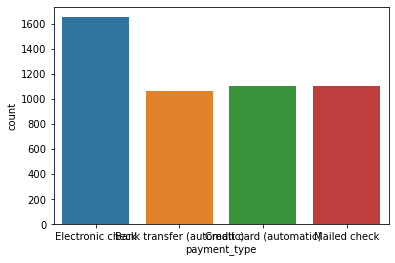

In [8]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

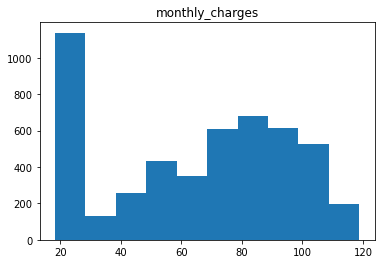

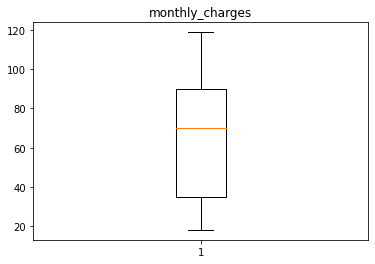

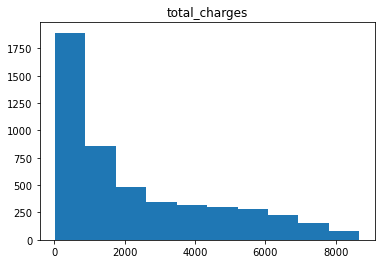

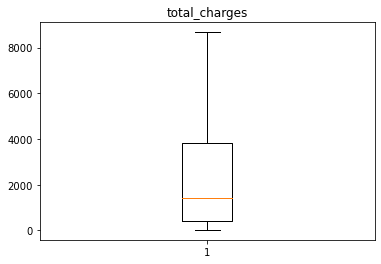

In [9]:
# Visualize float columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

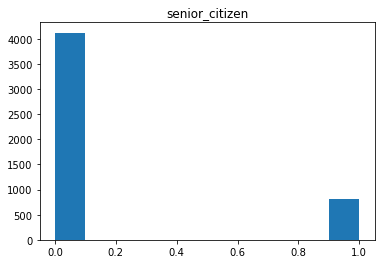

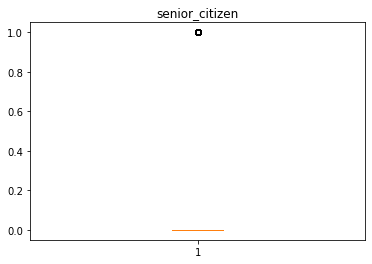

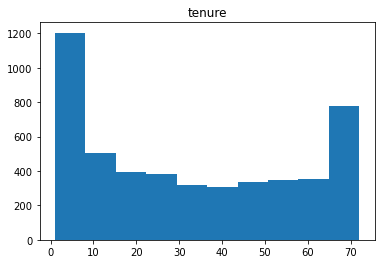

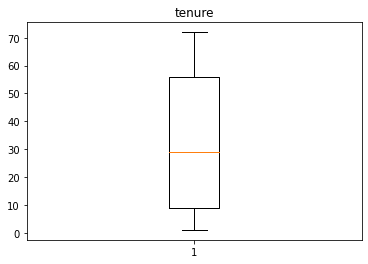

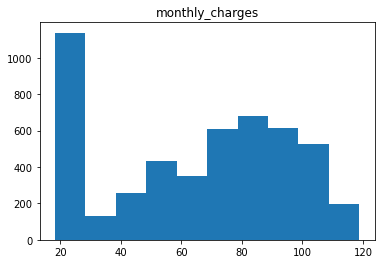

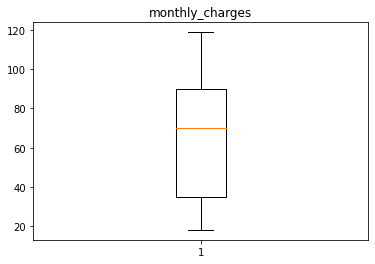

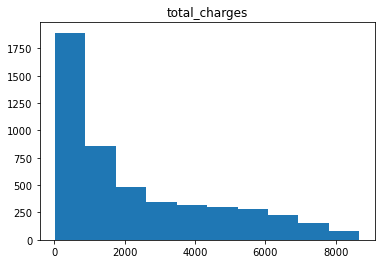

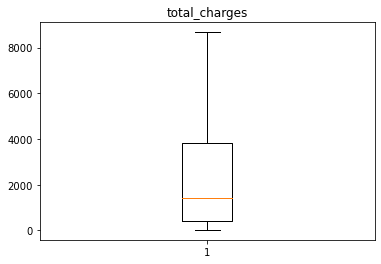

In [10]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

### Bivariate Analysis

In [11]:
def cat_vis(train, col):
    plt.title('Relationship of churn rate and '+col)
    sns.barplot(x=col, y='churn', data=train)
    survival_rate = train.churn.mean()
    plt.axhline(survival_rate, label='churn rate')
    plt.legend()
    plt.show()

In [12]:
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and churn rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

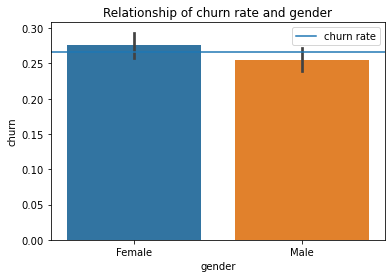

We fail to reject the null hypothesis that gender and churn rate are independent
There appears to be no relationship between survival rate and gender


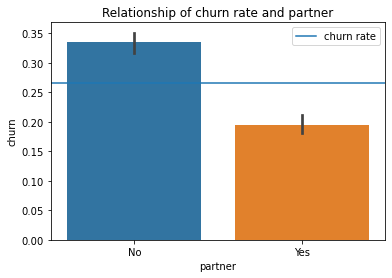

We reject the null hypothesis that partner and churn rate are independent
There is a relationship between churn rate and partner


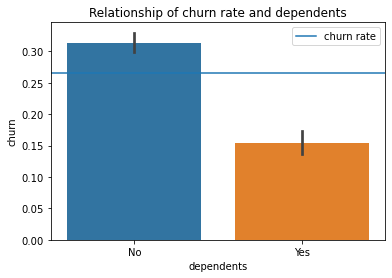

We reject the null hypothesis that dependents and churn rate are independent
There is a relationship between churn rate and dependents


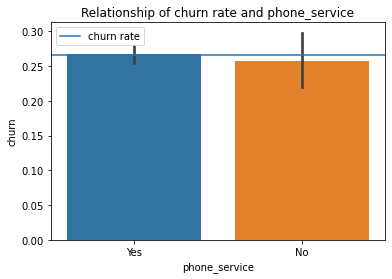

We fail to reject the null hypothesis that phone_service and churn rate are independent
There appears to be no relationship between survival rate and phone_service


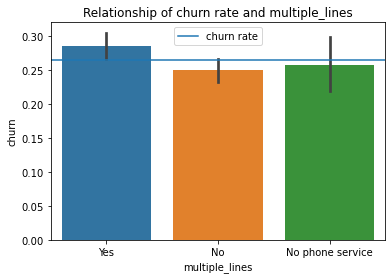

We reject the null hypothesis that multiple_lines and churn rate are independent
There is a relationship between churn rate and multiple_lines


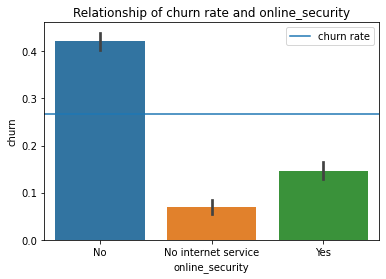

We reject the null hypothesis that online_security and churn rate are independent
There is a relationship between churn rate and online_security


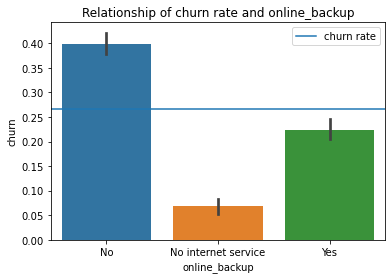

We reject the null hypothesis that online_backup and churn rate are independent
There is a relationship between churn rate and online_backup


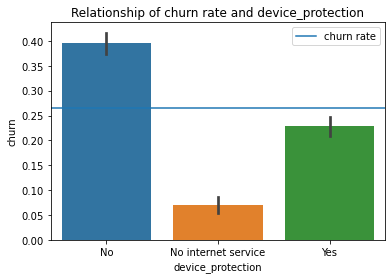

We reject the null hypothesis that device_protection and churn rate are independent
There is a relationship between churn rate and device_protection


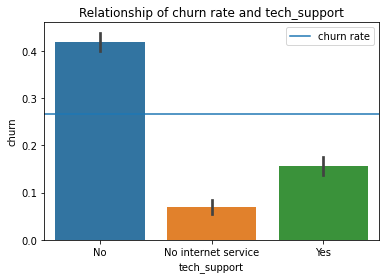

We reject the null hypothesis that tech_support and churn rate are independent
There is a relationship between churn rate and tech_support


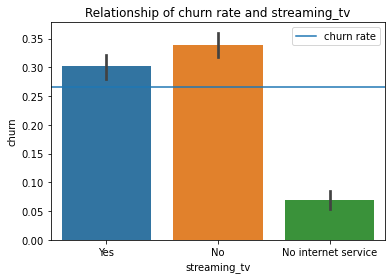

We reject the null hypothesis that streaming_tv and churn rate are independent
There is a relationship between churn rate and streaming_tv


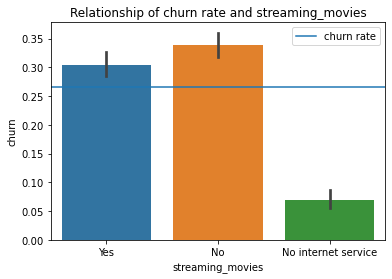

We reject the null hypothesis that streaming_movies and churn rate are independent
There is a relationship between churn rate and streaming_movies


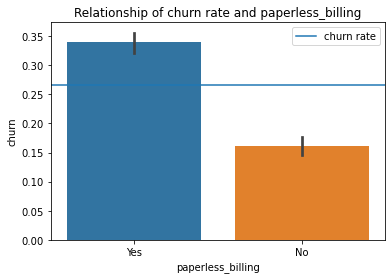

We reject the null hypothesis that paperless_billing and churn rate are independent
There is a relationship between churn rate and paperless_billing


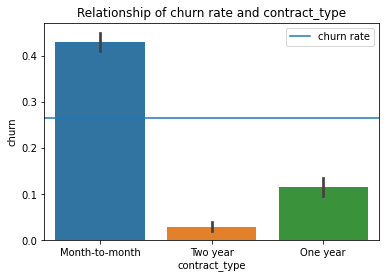

We reject the null hypothesis that contract_type and churn rate are independent
There is a relationship between churn rate and contract_type


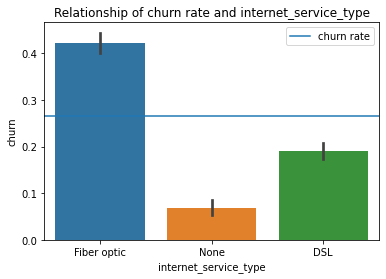

We reject the null hypothesis that internet_service_type and churn rate are independent
There is a relationship between churn rate and internet_service_type


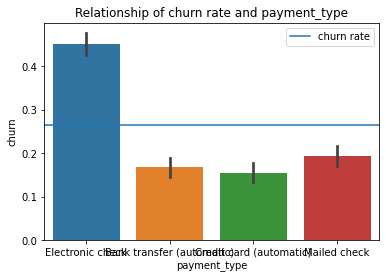

We reject the null hypothesis that payment_type and churn rate are independent
There is a relationship between churn rate and payment_type


In [13]:
for col in cat_vars:
    cat_vis(train, col)
    cat_test(train, col)

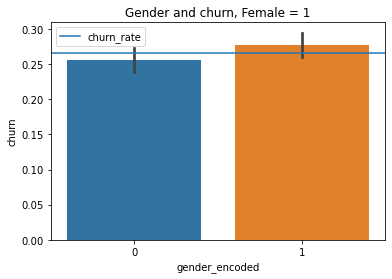

In [14]:
#Looking at relationship between gender and churn

plt.title("Gender and churn, Female = 1")
sns.barplot(x="gender_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### 1. Gender_Encoded (female ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of women is less than or equal to the chrn rate of men.

H^a: The churn rate of women is greater than the churn rate of men

In [15]:
# Chi-Square test to compare two categorical variables (Gender and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of women is less than or equal to the chrn rate of men."
alternative_hypothesis = "The churn rate of women is greater than the churn rate of men."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['gender_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Fail to reject the null
Insufficient evidence to reject the null


#### Conclusion for gender: not a significant difference for churn rate

## Is there a relationship between being a Senior Citizen and Churn rate?

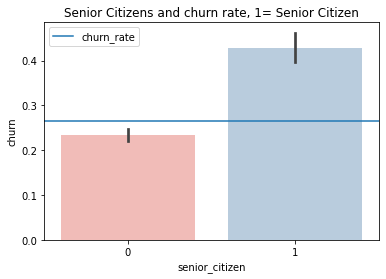

In [16]:
#Create bar chart (senior_citizen)
w.get_bar_senior(train)

### Senior Citizen vs. Churn:

* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.**

$H_a$: **The churn rate of senior citizens is greater than the churn rate of non-senior citizens.**

In [17]:
#Get chi-square test results
w.get_chi_senior(train)

chi^2 = 128.7112
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that "Senior Citizen" and "Churn" are related. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does a customer having a partner affect churn?

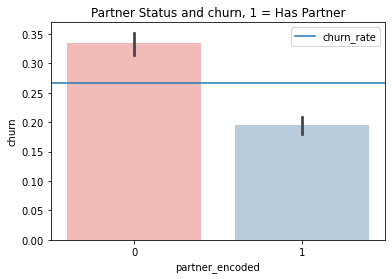

In [18]:
#Visualizing relationship between partner status and churn
w.get_bar_partner(train)

#### It appears that those with partners churn less than those without.

### Partner Status vs. Churn: Looking at the significance of the relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of partnered customers is greater than or equal to the churn rate of single customers.**

$H_a$: **The churn rate of partnered customers is less than the churn rate of single customers.**

In [19]:
def get_chi_partner(train):
    '''gets results of chi-square test for partner status and churn'''
    observed = pd.crosstab(train.churn, train['partner_encoded'])

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')

In [20]:
w.get_chi_partner(train)

chi^2 = 121.8975
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that a customer having a partner and churn are related. However, this feature is similar to having dependents, and may not add value when included in modeling.**

In [21]:
# Chi-Square test to compare two categorical variables (Partner and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of partnered customers is greater than or equal to the churn rate of single customers."
alternative_hypothesis = "The churn rate of partnered customers is less than the churn rate of single customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['partner_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of partnered customers is greater than or equal to the churn rate of single customers.
Sufficient evidence to move forward understanding that The churn rate of partnered customers is less than the churn rate of single customers.


### Conclusion for partner status: significant relationship

## Does a customer having dependents affect churn?

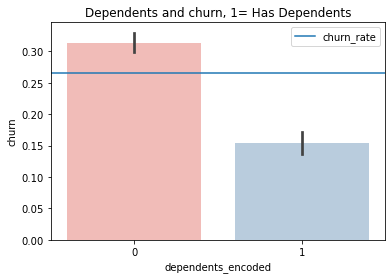

In [22]:
w.get_bar_dependents(train)

### It appears that customers with dependents churn less than those without dependents.

### Dependents vs. Churn: Testing Significance of Relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of those with dependents is greater than or equal to those without dependents.**

$H_a$: **The churn rate of those with dependents is less than those without dependents.**

In [23]:
#Run chi-square test on dependents vs churn
w.get_chi_dependents(train)

chi^2 = 133.9467
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that a customer having dependents is related to churn rate. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does customer contract type affect churn?

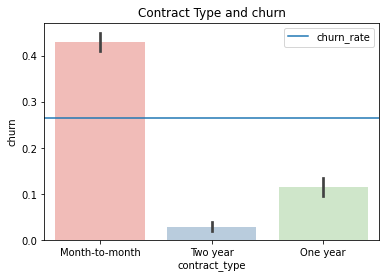

In [24]:
w.get_bar_contract(train)

#### It appears that customers with month-to-month contracts churn at a much higher rate than those with two-year contracts. Customers with one-year contracts churn less than month-to-month, but more than two-year contact customers.

### Contract Type vs. Churn: Testing Significance of Relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: The churn rate of those on a month-to-month contract is less than or equal to other customers.

$H_a$: The churn rate of those on a month-to-month contract is greater than other customers.

In [25]:
#Running chi-squared test comparing contract type and churn
w.get_chi_contract(train)

chi^2 = 837.2493
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer contract type is related to churn rate. I believe that including this feature in modeling will likely have a strong positive impact on model accuracy.**

## Examining Numeric variables vs discrete (Churn)

In [26]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,0,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,0


In [27]:
num_vars

['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']

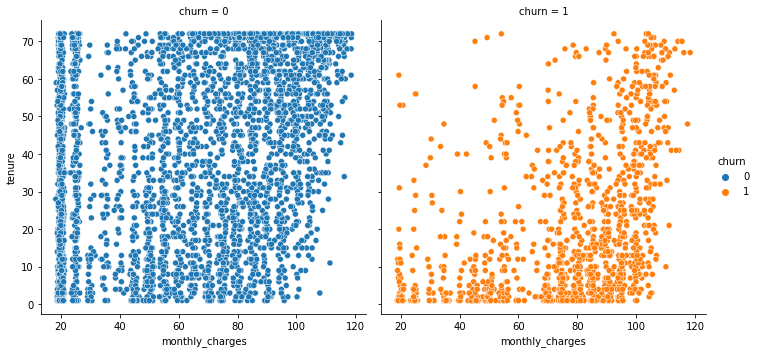

In [28]:
sns.relplot(data=train, x='monthly_charges', y='tenure', kind='scatter', hue='churn', col='churn')

<AxesSubplot:xlabel='churn', ylabel='tenure'>

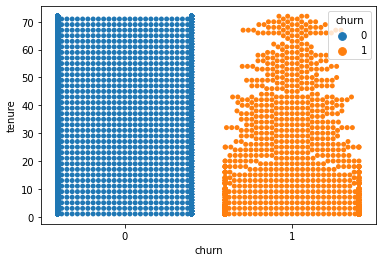

In [29]:
sns.swarmplot(data=train, x='churn', y='tenure', hue='churn')

### Looking at tenure vs. churn rate

In [30]:
# Subset the data into churn and not-churned status
not_churned = train[train.churn == 0]
churned = train[train.churn == 1]

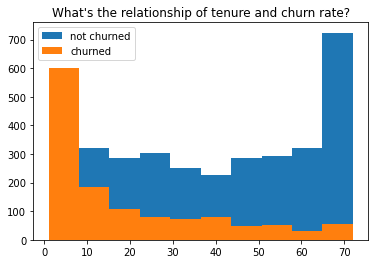

In [31]:
plt.title("What's the relationship of tenure and churn rate?")
plt.hist(not_churned.tenure, label="not churned")
plt.hist(churned.tenure, label="churned")
plt.legend()
plt.show()

#### It appears that customers with a longer tenure churn less

#### Establish Hypotheses:

$H_0$ : null_hypothesis = Customers with a higher mean tenure have a churn rate greater than or equal to those with a shorter tenure.

$H_a$: alternative_hypothesis = Customers with a higher mean tenure churn less than those with shorter tenure.

In [32]:
# check variances of the two groups
not_churned.tenure.var(), churned.tenure.var()

(581.7647560688213, 389.679911831285)

In [33]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.tenure, churned.tenure)
pval
# pval is significant so we can conclude variances are NOT equal

1.7397543077146337e-58

In [34]:
# Two-sample T-test to compare a continuous variable (tenure) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure."
alternative_hypothesis = "Customers with a higher tenure have a lower churn rate than those with shorter tenure."

# Setup test
t, p = stats.ttest_ind(not_churned.tenure, churned.tenure, equal_var=False)
t, p

(28.50778830481801, 3.210034358004407e-157)

In [35]:
if (p/2 < alpha) & (t > 0):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure.
Sufficient evidence to move forward understanding that Customers with a higher tenure have a lower churn rate than those with shorter tenure.


### Conclusion: Customers with a longer tenure (in months) have a lower churn rate than customers with lower tenures

## Does a customer's monthly charge amount impact churn?

In [36]:
# Subset the data into churn and not-churned status
not_churned = train[train.churn == 0]
churned = train[train.churn == 1]

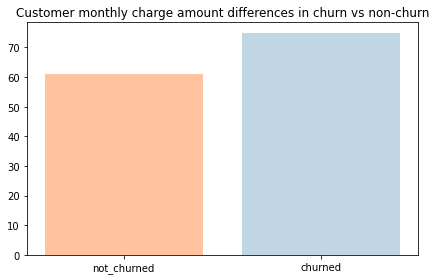

In [37]:
#Get viz of monthly charge vs churn
w.monthly_charges_md(train)

#### It appears that customers who have lower monthly charges churn less.

### Monthly Charges vs. Churn: Testing Significance of Relationship

* Monthly Charges is a continuous variable, and both populations are independent, so an independent T-Test is required.
* I used a 95% confidence interval (alpha value .05)
* Variances were tested and not equal, and indicated in testing parameter

Hypotheses:

$H_0$: **Customers with lower monthly charges have a churn rate greater than or equal to those with higher charges.**

$H_a$: **Customers with lower monthly charges have a lower churn rate than those with higher monthly charges.**

In [38]:
# check variances of the two groups
not_churned.monthly_charges.var(), churned.monthly_charges.var()

(965.508171621473, 603.4479280323469)

In [39]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.monthly_charges, churned.monthly_charges)
pval
# pval is significant so we can conclude variances are NOT equal

1.5630731582434918e-57

In [40]:
def get_t_monthly(train):
    "get t-test for monthly charges and churn"
    #Seperate samples into churn and not churn
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #Run t-test on these groups, variances are not equal
    t, p = stats.ttest_ind(not_churned.monthly_charges, churned.monthly_charges, equal_var=False)

    print(f't = {t:.4f}')
    print(f'p = {p:.4f}') 

In [41]:
#Run T-test comparing monthly charges and churn status
w.get_t_monthly(train)

t = -16.0750
p = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer monthly charge amount is related to churn rate. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does the total charges a customer has accrued impact churn rate?

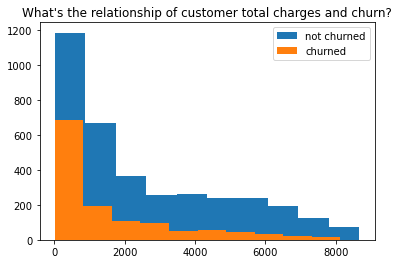

In [42]:
plt.title("What's the relationship of customer total charges and churn?")
plt.hist(not_churned.total_charges, label="not churned")
plt.hist(churned.total_charges, label="churned")
plt.legend()
plt.show()

<AxesSubplot:xlabel='total_charges'>

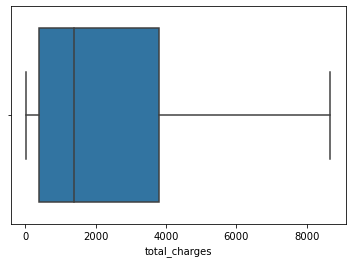

In [43]:
sns.boxplot(x='total_charges', data=train)

In [44]:
def total_charges_md(train):
    # Subset the data into churn and not-churned status
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #assign values and labels
    values = [not_churned.total_charges.mean(), churned.total_charges.mean()]
    labels = ['not_churned', 'churned']
    # generate and display chart
    plt.bar(height=values, x=labels, color=['#ffc3a0', '#c0d6e4'])
    plt.title('Customer mean total charge differences (churn vs non-churn)')
    plt.tight_layout()
    plt.show()

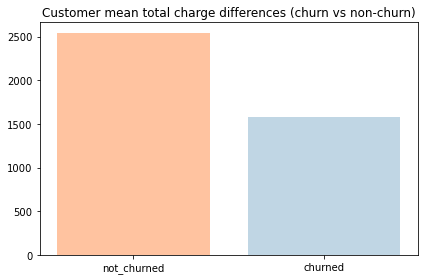

In [45]:
total_charges_md(train)

$H_0$ : null_hypothesis = "Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges."

$H_a$: alternative_hypothesis = "Customers with higher total charges have a lower mean churn rate than those with lower total charges."

#### It appears that the mean total charges for customers who churned is higher than those who did not churn

In [46]:
# check variances of the two groups
not_churned.total_charges.var(), churned.total_charges.var()

(5357521.492075216, 3652610.2915710476)

In [47]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.total_charges, churned.total_charges)
pval
# pval is significant so we can conclude variances are NOT equal

4.5964991297566226e-23

In [48]:
# Two-sample T-test to compare a continuous variable (monthly charges) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges."
alternative_hypothesis = "Customers with higher total charges have a lower mean churn rate than those with lower total charges."

# Setup test
t, p = stats.ttest_ind(not_churned.total_charges, churned.total_charges, equal_var=False)
t, p

(14.693186342527401, 3.9686459602437414e-47)

In [49]:
if (p/2 < alpha):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges.
Sufficient evidence to move forward understanding that Customers with higher total charges have a lower mean churn rate than those with lower total charges.


## Exploration Summary

In [50]:
#Baseline accuracy
(y_train == 0).mean()

NameError: name 'y_train' is not defined

In [ ]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

# Modeling
* I will use accuracy as my evaluation metric
* non-churned customers makeup 73% of the data
* by guessing non-churn for every customer, one could achieve an accuracy of 73%
* 73% will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data

### Modeling

In [ ]:
#preparing data for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test = w.model_prep(train, validate, test)

In [ ]:
X_train.head()

In [ ]:
X_train.shape
X_validate.shape
X_test.shape

In [ ]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

In [ ]:
#Baseline Accuracy
(y_train == 0).mean()

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
# model.fit(X, y)
tree.fit(X_train, y_train)

In [ ]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

In [ ]:
#Use your model to make predictions on the in-sample data
tree.predict(X_train)

In [ ]:
y_pred = tree.predict(X_train)
actual = y_train

In [ ]:
y_pred.shape

In [ ]:
#Baseline accuracy
(y_train == 0).mean()

In [ ]:
y_pred_proba = tree.predict_proba(X_train)
y_pred_proba[0:5]

### Evaluating in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
confusion_matrix(actual, y_pred)

In [ ]:
print(classification_report(actual, y_pred))

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

### 76 percent accuracy for decision tree on training set

In [ ]:
# confusion matrix

confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

In [ ]:
#Calculating TP, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

### Evaluate on validate data

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred_validate = tree.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_validate))

In [ ]:
# confusion matrix

confusion_matrix(y_validate, y_pred_validate)

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_pred_validate, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

In [ ]:
#Running on validate
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred_validate).ravel()
TN, FP, FN, TP

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

### Conclusion for decision tree (depth 3): very close results between training and validate. 76/75 percent accuracy respectively. Baseline is 73.4 so both outperform baseline

### Looking at changing depth

In [ ]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

### Comparing in-sample to out of sample performance

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

#### It appears that a depth of 3-5 would be the best to ensure closer performance on test/validate

### Re-run decision tree with depth of 4

In [ ]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=123)
# model.fit(X, y)
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_train)
actual = y_train

In [ ]:
y_pred_proba = tree2.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
confusion_matrix(actual, y_pred)

In [ ]:
# Classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 4 depth")
pd.DataFrame(report)

In [ ]:
#Calculating TP, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

#### Running against validate data

In [ ]:
y_pred_validate = tree2.predict(X_validate)

In [ ]:
#Running on validate
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred_validate).ravel()
TN, FP, FN, TP

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

#### I will use decision tree model with depth of 3, it has a slightly lower accuracy than four, and a small difference in accuracy between training and validate data. It also has a higher recall rate (0.61) than tree model with depth of 4.

## Random Forest Modeling

In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
#fit the model, max depth 3, min sample leaf 3
rf.fit(X_train, y_train)

In [ ]:
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

In [ ]:
#Visualize feature importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [ ]:
#interpret feature weight
X_train.head()

In [ ]:
#Make predictions
y_pred = rf.predict(X_train)

In [ ]:
#Estimate Probability
y_pred_proba = rf.predict_proba(X_train)

### Evaluate model performance on training data

In [ ]:
#Evaluate model performance
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
rf.score(X_train, y_train)

In [ ]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

### Comparing in-sample to out of sample performance (evaluate on validate data)

In [ ]:
rf.score(X_validate, y_validate)

In [ ]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

In [ ]:
y_pred_validate = tree2.predict(X_validate)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

### Comparing accuracy of different depths

In [ ]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

### Looking at increasing min samples of leaf while decreasing max depth

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### increase both min_samples_per_leaf and max_depth

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

### fixed depth and increasing min_samples_leaf

In [ ]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()

### Going to rerun  random forest modeling with max depth of 5, min samples leaf of 5

In [ ]:
rf5 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [ ]:
#fit the model, max depth 5, min sample leaf 5
rf5.fit(X_train, y_train)

In [ ]:
# Evaluate importance, or weight, of each feature.
print(rf5.feature_importances_)

In [ ]:
#Visualize feature importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [ ]:
#Make predictions
y_pred = rf5.predict(X_train)

In [ ]:
#Estimate Probability
y_pred_proba = rf5.predict_proba(X_train)

### Evaluate performance of rf model (5,5) on training data

In [ ]:
#Evaluate model performance
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf5.score(X_train, y_train)))

In [ ]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf5.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

#### Performance of RF model (5,5) on validate data

In [ ]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf5.score(X_validate, y_validate)))

In [ ]:
y_pred_validate = tree2.predict(X_validate)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

### Conclusion for RF modeling: our best model is 76 percent accurate on training and validation data, about the same as decision tree. Recall (0.52) and precision (0.52)

## K Nearest Neighbor modeling

In [ ]:
#Starting with basic model, 5 neighbors
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
#fitting the model
knn.fit(X_train, y_train)

In [ ]:
#Making predictions
y_pred = knn.predict(X_train)

In [ ]:
#Estimating probability
y_pred_proba = knn.predict_proba(X_train)

In [ ]:
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
#Classification Report
print(classification_report(y_train, y_pred))

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [ ]:
ALL = TP + TN + FP + FN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

#### Performance on Validate

In [ ]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

In [ ]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [ ]:
# iteration to look at different model accuracies:
model_set = []
model_accuracies = {}
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    model_set.append(clf)
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(clf.score(X_train, y_train), 2),
        'validate_score': round(clf.score(X_validate, y_validate), 2)}

In [ ]:
model_accuracies

In [ ]:
#another iteration to look at best k score
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

### Attempting to look further into metrics of k=14

In [ ]:
#Running knn on 14
knn14 = KNeighborsClassifier(n_neighbors=14, weights='uniform')
#fitting the model
knn14.fit(X_train, y_train)
#Making predictions
y_pred = knn14.predict(X_train)
#Estimating probability
y_pred_proba = knn14.predict_proba(X_train)
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn14.score(X_train, y_train)))

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
#Classification Report
print(classification_report(y_train, y_pred))

In [ ]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

In [ ]:
#Plot confusion matrix
plot_confusion_matrix(knn14, X_train, y_train)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel() # Why is this line of code failing?

In [ ]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

In [ ]:
print('Accuracy of KNN (14) classifier on validate set: {:.2f}'
     .format(knn14.score(X_validate, y_validate)))

In [ ]:
y_pred_validate = knn14.predict(X_validate)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

### Conclusion for KNN: a KNN model using 14 nearest neighbors produces an accuracy of .79 percent accuracy on training data, but only 0.75 accuracy on validate data. Additionally, this model produces a large (0.59) portion of False Negatives.

## Regression Modeling

In [ ]:
# Make the model, using defaults but lbfgs solver (could be default)
logit = LogisticRegression(solver='lbfgs',random_state=123)

In [ ]:
# fit the model on train data
logit.fit(X_train, y_train)

In [ ]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [ ]:
# look at predicted probabilites for first 10 observations
logit.predict_proba(X_train)[:10]

In [ ]:
# classification report for training data
print(classification_report(y_train, y_pred))

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [ ]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

In [ ]:
# look at model 1 coefficents
 
print('Coefficient: \n', logit.coef_[0])

In [ ]:
# Make a dataframe of model 1 coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

#### Examining model 1 performance on validate data

In [ ]:
print('Logit model 1, default features, solver lbfgs')
print(classification_report(y_validate, logit.predict(X_validate)))

#### Making a second iteration of regression, but balancing class weights

In [ ]:
#Making a second iteration of regression, but balancing class weights
logit2 = LogisticRegression(solver='lbfgs', random_state=123, class_weight='balanced')

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
ALL = TN + FP + FN + TP

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

#### Examining model 2 performance on validate data

In [ ]:
print('Logit model 2, balancing class weights, solver lbfgs')
print(classification_report(y_validate, logit2.predict(X_validate)))

### Conclusion for regession:  The original model performed equally well (accuracy) on both train and validate data (0.75). However, recall is very low (0.38) compared to other models with precision being 0.54

## Overall conclusion on modeling: Based on results of the modeling section, I am moving forward with my best model. My best model is a decision tree with a depth of 3. I chose this model because it performed almost equally well on testing and training data (0.756 on train, 0.75 on validate). It also produced the best combination of Recall and precision with both train and validate, with small differences between the two. 

## Predicting customers who will not churn but churn (a false negative) can be minimized by selecting a model with higher Recall. The decision tree (depth of 3) produced a model with 0.61 recall on both the training and validation data.

In [ ]:
def get_tree_test(X_train,X_test,y_train,y_test):
    '''get decision tree accuracy on train and test data'''
    #Testing on Decision Tree (depth of 3):
    tree = DecisionTreeClassifier(max_depth=3, random_state=123)
    # fitting the model(X, y)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_train)
    print(f"Accuracy of Decision Tree on train data is {tree.score(X_train, y_train)}")
    print(f"Accuracy of Decision Tree on test data is {tree.score(X_test, y_test)}")

In [ ]:
w.get_tree_test(X_train,X_test,y_train,y_test)

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))